In [12]:
import csv
data_lists = {}
i = 0
with open('ExperimentRunner/src/seir-experiment-influenza1_1_1.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        data_lists[i] = list(row)
        i=i+1

# print data_lists
timesteps = {}
events = {}
s = {}
e = {}
i = {}
r = {}
k = 0
for j in data_lists:
    if j%6==0:
        timesteps[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%6==1:
        events[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%6==2:
        s[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%6==3:
        e[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%6==4:
        i[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%6==5:
        r[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        k=k+1

max_time = 0
for j in timesteps:
    local_max = max(timesteps[j])
    if local_max>max_time:
        max_time = local_max

for j in timesteps:
    index = 0
    local_s = [0]*(max_time+1)
    local_e = [0]*(max_time+1)
    local_i = [0]*(max_time+1)
    local_r = [0]*(max_time+1)
    last_value_s = s[j][0]
    last_value_e = e[j][0]
    last_value_i = i[j][0]
    last_value_r = r[j][0]
    for m in range(0, max_time+1):
        if index<len(timesteps[j]) and timesteps[j][index]==m:
            local_s[m] = s[j][index]
            last_value_s = s[j][index]
            local_e[m] = e[j][index]
            last_value_e = e[j][index]
            local_i[m] = i[j][index]
            last_value_i = i[j][index]
            local_r[m] = r[j][index]
            last_value_r = r[j][index]
            index=index+1
        else:
            local_s[m] = last_value_s
            local_e[m] = last_value_e
            local_i[m] = last_value_i
            local_r[m] = last_value_r
    s[j] = local_s
    e[j] = local_e
    i[j] = local_i
    r[j] = local_r
    

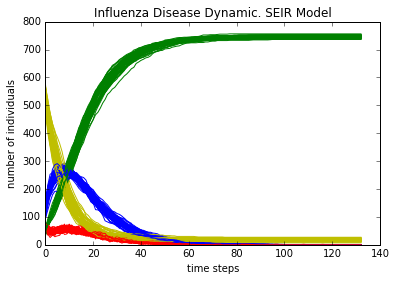

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
rdr = {}
plots = {}
index = 0
for j in s:
    plots[index] = plt.plot(range(0,max_time+1), s[j], 'y-', label='susceptible')
    index=index+1
    plots[index] = plt.plot(range(0,max_time+1), e[j], 'b-', label='exposed')
    index=index+1
    plots[index] = plt.plot(range(0,max_time+1), i[j], 'r-', label='infected')
    index=index+1
    plots[index] = plt.plot(range(0,max_time+1), r[j], 'g-', label='removed')
    index=index+1
plt.title('Influenza Disease Dynamic. SEIR Model')
plt.xlabel('time steps')
plt.ylabel('number of individuals')
# plt.legend([plots[index] for index in plots if index<6],['susceptible','exposed', 'infected', 'dead', 'removed'])
plt.savefig('influenza-all-data.png')
_ = plt.show()

In [14]:
s_average = [0]*(max_time+1)
e_average = [0]*(max_time+1)
i_average = [0]*(max_time+1)
r_average = [0]*(max_time+1)
num_of_experiments = len(s)
for m in range(0, max_time+1):
    local_sum_s = 0
    local_sum_e = 0
    local_sum_i = 0
    local_sum_r = 0
    for j in s:
        local_sum_s=local_sum_s+s[j][m]
        local_sum_e=local_sum_e+e[j][m]
        local_sum_i=local_sum_i+i[j][m]
        local_sum_r=local_sum_r+r[j][m]
    s_average[m]=(local_sum_s+0.0)/num_of_experiments
    e_average[m]=(local_sum_e+0.0)/num_of_experiments
    i_average[m]=(local_sum_i+0.0)/num_of_experiments
    r_average[m]=(local_sum_r+0.0)/num_of_experiments

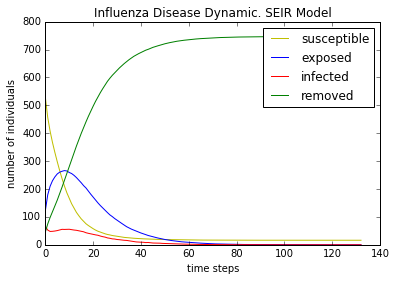

In [19]:
plt.plot(range(0,max_time+1), s_average, 'y-',label='susceptible')
plt.plot(range(0,max_time+1), e_average, 'b-',label='exposed')
plt.plot(range(0,max_time+1), i_average, 'r-',label='infected')
plt.plot(range(0,max_time+1), r_average, 'g-',label='removed')
plt.title('Influenza Disease Dynamic. SEIR Model')
plt.xlabel('time steps')
plt.ylabel('number of individuals')
plt.legend(loc = 'upper right')
plt.savefig('influenza-averaged.png')
_ = plt.show()